# Momentum Trading Strategy Implementation

This notebook implements a momentum-based trading strategy for stocks. The strategy:
1. Calculates momentum using 10-day returns
2. Takes long positions when momentum is in the top 10th percentile
3. Compares performance against buy-and-hold

In [10]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualizations
sns.set()


## Data Collection and Preparation

In [11]:
# Fetch AAPL data
ticker = yf.Ticker("AAPL")
data = ticker.history(period="max")[['Close']]
data.tail()

/opt/homebrew/Caskroom/miniforge/base/envs/stock_analysis/lib/python3.9/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


,Close
Date,
2025-02-10 00:00:00-05:00,227.649994
2025-02-11 00:00:00-05:00,232.619995
2025-02-12 00:00:00-05:00,236.869995
2025-02-13 00:00:00-05:00,241.529999
2025-02-14 00:00:00-05:00,244.600006


## Strategy Implementation

In [12]:
# Calculate momentum and generate signals
data['momentum'] = data['Close'].pct_change(periods=10)
data['signal'] = np.where(data['momentum'] > data['momentum'].quantile(0.9), 1, 0)
data['position'] = data['signal'].shift(1)
data['returns'] = data['Close'].pct_change()
data['strategy_returns'] = data['position'] * data['returns']

## Performance Analysis

In [13]:
# Calculate key metrics
total_return = data['strategy_returns'].sum()
sharpe_ratio = data['strategy_returns'].mean() / data['strategy_returns'].std() * np.sqrt(252)
max_drawdown = (data['strategy_returns'].cumsum().cummax() - data['strategy_returns'].cumsum()).max()

print(f"Strategy Performance Metrics:\n")
print(f"Total Return: {total_return:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Max Drawdown: {max_drawdown:.2%}")

Strategy Performance Metrics:

Total Return: 155.28%
Sharpe Ratio: 0.22
Max Drawdown: 86.40%


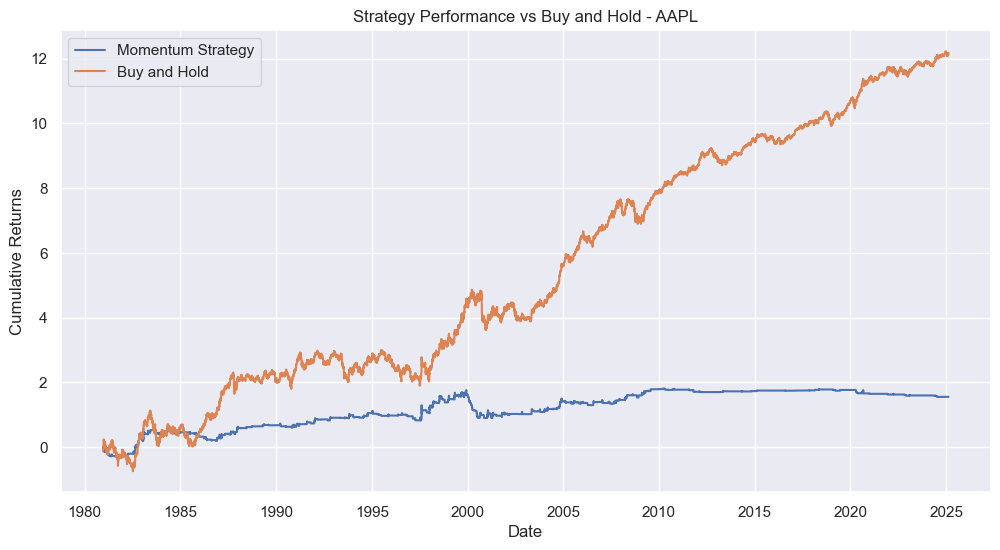

In [14]:
# Visualize performance
plt.figure(figsize=(12,6))
plt.plot(data['strategy_returns'].cumsum(), label='Momentum Strategy')
plt.plot(data['returns'].cumsum(), label='Buy and Hold')
plt.title('Strategy Performance vs Buy and Hold - AAPL')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()